# Multi-class Dog Bread Classification(Using Google Colab)

> It is used to build a multi-class image classifier using Tensorflow(2.0) and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data we are using has been provided by the kaggle website under the Dog Breed identification dataset.

Link -> https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

Link -> https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Information of the data:-

* Dealing with images of dogs(unstructured data). So it is best we either use Deep learning or transfer learning.
* There are 120 breeds of dogs which means that there are 120 different classes/categories of dogs.
* There are around 10,000+ images in both the training and the test dataset.(The images of the training set are labelled whereas the test set are not as we want to predict them)



In [107]:
# from google.colab import drive
# drive.mount('/content/drive')

In [108]:
 # Import Tensorflow and Tensorflow Hub in colab

import tensorflow as tf
import tensorflow_hub as hub

print('Tensorflow version: ', tf.__version__)
print('Tensorflow Hub version: ', hub.__version__)

Tensorflow version:  2.7.0
Tensorflow Hub version:  0.12.0


In [109]:
# Checking if a GPU is available
print('GPU', 'available' if tf.config.list_physical_devices("GPU") else 'not available')

GPU available


In [110]:
print("Devices", tf.config.list_physical_devices())

Devices [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [111]:
# Changed the runtime to use a GPU. Checking to see if it worked. From 'runtime' then click 'change runtime type' and then select 'GPU' option.
print("Devices", tf.config.list_physical_devices())
print('GPU', 'available' if tf.config.list_physical_devices("GPU") else 'not available')

Devices [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU available


# Getting the data

> With all machine learning models, we have to convert the data in numerical format. Turning the images into tensors(numerical representation).

In [112]:
# Importing the data into colab
import pandas as pd

df= pd.read_csv('./drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/labels.csv')
print(df.head())
print(df.describe())


                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     840b67d26e5e43f8eb6430f62d4ba1ac  scottish_deerhound
freq                                   1                 126


In [113]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [114]:
df['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

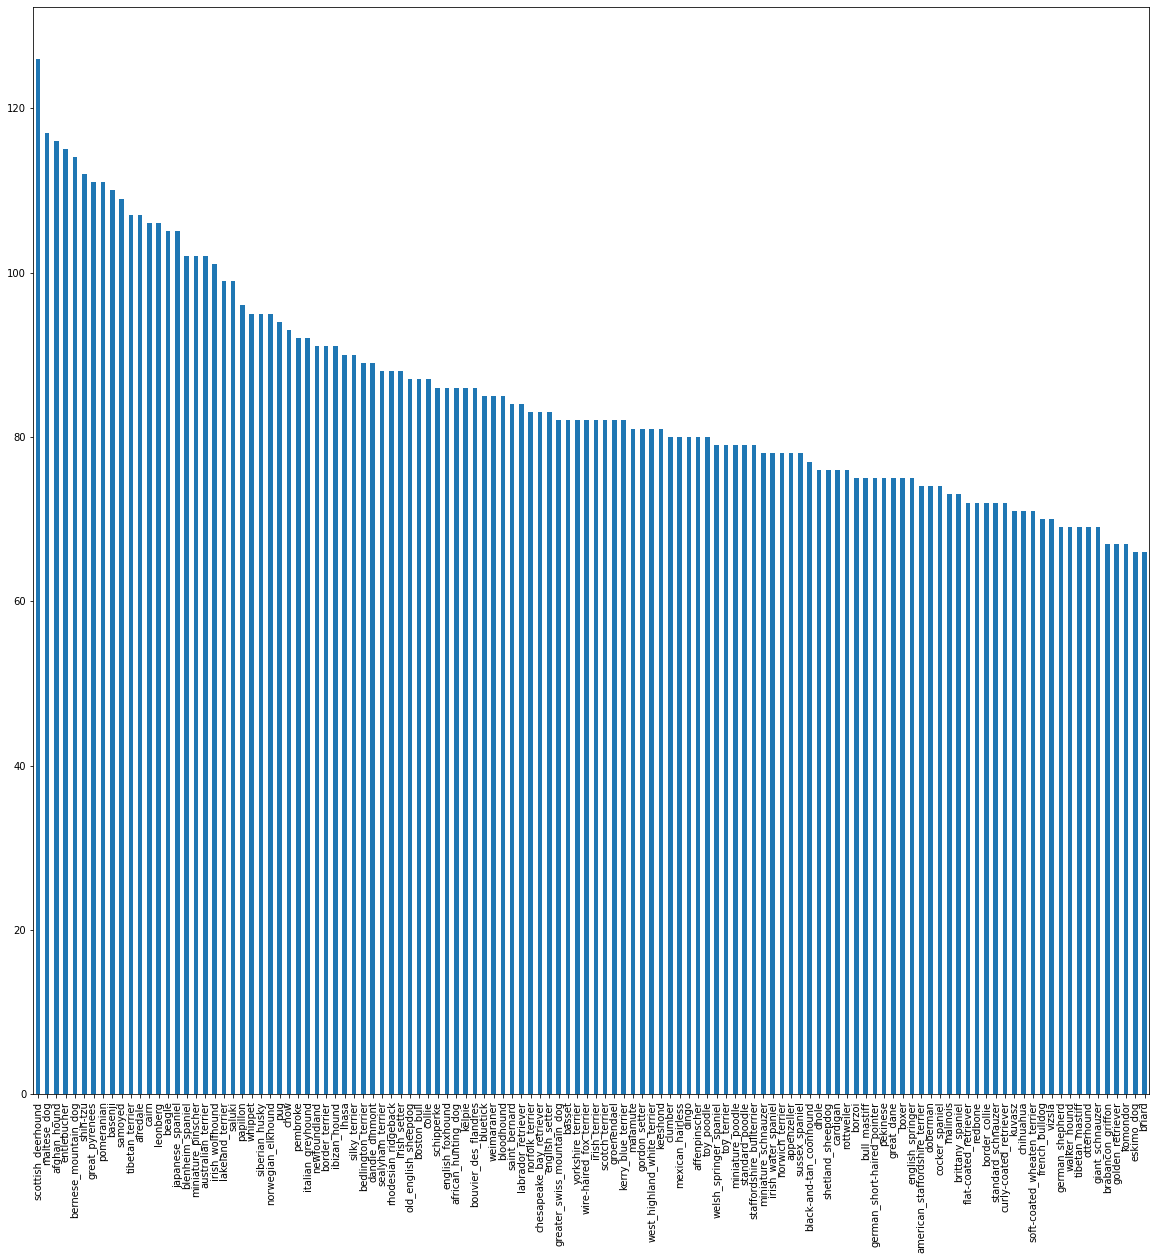

In [115]:
df['breed'].value_counts().plot.bar(figsize=(20,20))

In [116]:
df['breed'].value_counts().median()

82.0

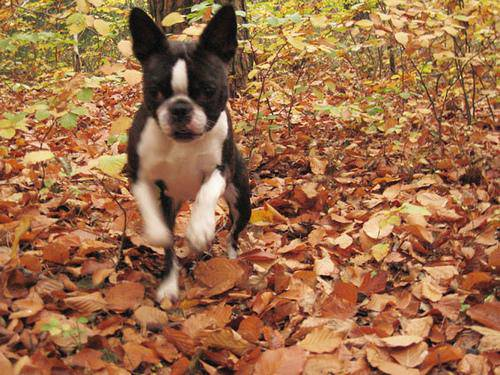

In [117]:
# View an image
from IPython.display import Image
Image('./drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [118]:
# Getting the images and labels

filenames= ["./drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/" + fname + ".jpg" for fname in df['id']]

filenames[:10]

['./drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 './drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 './drive/MyDrive/Dog-breed-identification-data/dog-bree

In [119]:
import os
os.listdir('./drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/')[:10]

['e07e46622e95d95ed698113415aaeda6.jpg',
 'e58763e5a8e37bcede344260eb20f26d.jpg',
 'de41f775f1b52a040d0965e0923bc983.jpg',
 'e297c765ac7e6c1d7c4657c7e72b1544.jpg',
 'e47a26a0b4510b25250f654577207ed3.jpg',
 'e93489f9d52d63c373264b27daabf420.jpg',
 'e5ec89512b1aa4594fffa72867874a27.jpg',
 'e00130d97b9b4073e79e0aed53fedc3c.jpg',
 'e1be68b2576ddfceabb23d33ee9e07ef.jpg',
 'e5fe6ce882c440a45354722376fdb770.jpg']

In [120]:
import os
if len(os.listdir('./drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/')) == len(filenames):
  print('The amount of files match!!')
else:
  print('The amount of file do not match') 

The amount of files match!!


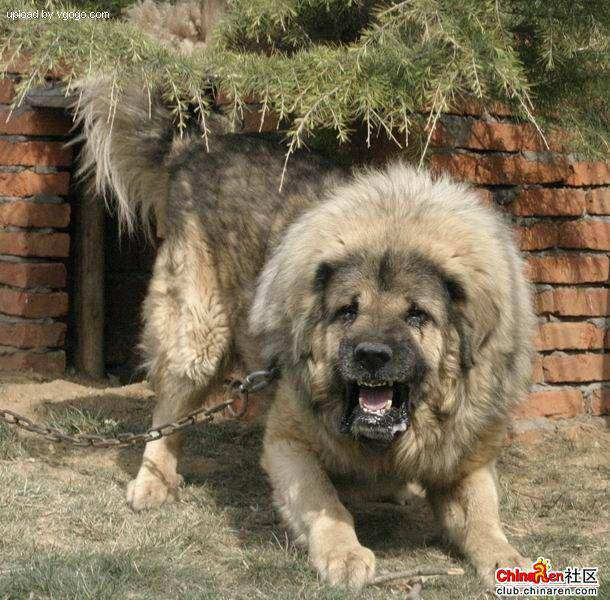

In [121]:
Image(filenames[9000])

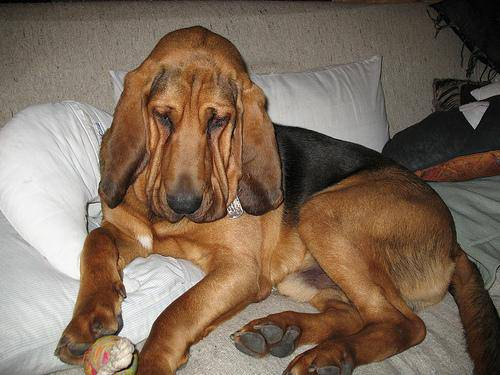

In [122]:
Image(filenames[69])

In [123]:
df['breed'][9000]

'tibetan_mastiff'

In [124]:
df['breed'][69]

'bloodhound'

In [125]:
labels= df['breed']
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

## Getting the labels

In [126]:
import numpy as np

# labels= np.array(labels) Does the same thing as below
labels= df['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [127]:
len(labels)

10222

In [128]:
# Checking to see if the number of labels matches the number of filenames

if len(labels) == len(filenames):
  print("The number of labels and filenames match")
else:
  print("The number of labels and filenames do not match")

The number of labels and filenames match


In [129]:
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [130]:
len(unique_breeds)

120

In [131]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [132]:
print(labels[2])
labels[5] == unique_breeds

pekinese


array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [133]:
# Turning every label into a boolean array

boolean_arrays= [label == unique_breeds for label in labels]
boolean_arrays[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [134]:
len(boolean_arrays)

10222

In [135]:
len(labels)

10222

In [136]:
# Turning the boolean array into integers

print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_arrays[0].argmax())
print(boolean_arrays[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [137]:
boolean_arrays[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Creating our own validation set

> Since the dataset provided by kaggle has only train and test set, so we are creating a validation set to validate the experiments we had done while training the model on the training set.

In [138]:
X= filenames
y= boolean_arrays

In [139]:
# This is a google colab feature.
NUM_IMAGES=1000 #@param {type:'slider', min:1000, max: 10000, step: 1000}

In [140]:
# Splitting the training set into  training and validation set

from sklearn.model_selection import train_test_split

X_train, x_val, y_train, y_val= train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES],test_size=0.2)

len(X_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [141]:
X_train[:2], x_val[:2], y_train[:2], y_val[:2]

(['./drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/06cd8e3fbfe72c34461814239e1deab8.jpg',
  './drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/07192213791150248bfb5bbe6b0b0373.jpg'],
 ['./drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/165f26ae3d9dfe88e10f7929c031b1c8.jpg',
  './drive/MyDrive/Dog-breed-identification-data/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, Fa

## Preprocessing Images(Turning them into tensors)

> To preprocess the images into tensors

* Take the filepath of the image as an input
* Use Tensorflow to read the file and save it to a variable, `image`
* Turn the `image` into tensors
* Normalizing the RGB values, 0-255 to 0-1 values
* Resizing the `image` to be in a standard shape for easier processing(224,224)
* Now, returhn the modified image

In [142]:
IMG_SIZE= 224
def process_image(image_path,img_size=IMG_SIZE):
  """
    Taking the filepath of an image and converting it into a tensor.
  """

  # Reading the filepath
  image= tf.io.read_file(image_path)
  # Turning the image into tensors
  image=tf.image.decode_jpeg(image, channels=3)
  # Normalizing the RGB values, 0-255 to 0-1 values
  image= tf.image.convert_image_dtype(image, tf.float32)
  # Resizing the images to a standard size for easier processing
  image=tf.image.resize(image,size=[img_size,img_size])

  # Returning the modified image

  return image

In [143]:
tensor=tf.io.read_file(filenames[21])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01@\x01\x86\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [144]:
tensor=tf.image.decode_jpeg(tensor, channels=3) 
tensor

<tf.Tensor: shape=(320, 390, 3), dtype=uint8, numpy=
array([[[ 83,  99,  88],
        [ 85, 101,  90],
        [ 85, 101,  90],
        ...,
        [ 40,  39,  44],
        [ 40,  39,  44],
        [ 40,  39,  44]],

       [[ 78,  94,  83],
        [ 81,  97,  86],
        [ 82,  98,  87],
        ...,
        [ 40,  39,  44],
        [ 40,  39,  44],
        [ 40,  39,  44]],

       [[ 71,  87,  76],
        [ 74,  90,  79],
        [ 77,  93,  82],
        ...,
        [ 40,  39,  44],
        [ 40,  39,  44],
        [ 40,  39,  44]],

       ...,

       [[ 29,  80,  49],
        [ 37,  88,  57],
        [ 47,  98,  67],
        ...,
        [116, 168, 120],
        [117, 166, 119],
        [108, 160, 112]],

       [[ 39,  90,  59],
        [ 43,  94,  63],
        [ 48,  99,  68],
        ...,
        [115, 169, 119],
        [118, 170, 121],
        [110, 164, 114]],

       [[ 50, 101,  70],
        [ 49, 100,  69],
        [ 46,  97,  66],
        ...,
        [117, 171, 12

In [145]:
tensor=tf.image.convert_image_dtype(tensor, tf.float32)
tensor

<tf.Tensor: shape=(320, 390, 3), dtype=float32, numpy=
array([[[0.3254902 , 0.38823533, 0.34509805],
        [0.33333334, 0.39607847, 0.3529412 ],
        [0.33333334, 0.39607847, 0.3529412 ],
        ...,
        [0.15686275, 0.15294118, 0.17254902],
        [0.15686275, 0.15294118, 0.17254902],
        [0.15686275, 0.15294118, 0.17254902]],

       [[0.30588236, 0.36862746, 0.3254902 ],
        [0.31764707, 0.3803922 , 0.3372549 ],
        [0.32156864, 0.38431376, 0.34117648],
        ...,
        [0.15686275, 0.15294118, 0.17254902],
        [0.15686275, 0.15294118, 0.17254902],
        [0.15686275, 0.15294118, 0.17254902]],

       [[0.2784314 , 0.34117648, 0.29803923],
        [0.2901961 , 0.3529412 , 0.30980393],
        [0.3019608 , 0.3647059 , 0.32156864],
        ...,
        [0.15686275, 0.15294118, 0.17254902],
        [0.15686275, 0.15294118, 0.17254902],
        [0.15686275, 0.15294118, 0.17254902]],

       ...,

       [[0.1137255 , 0.3137255 , 0.19215688],
        [0.14

In [146]:
from matplotlib.pyplot import imread
image= imread(filenames[69])
image

array([[[  4,   3,   0],
        [  7,   6,   2],
        [  9,   8,   4],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[  4,   3,   0],
        [  3,   2,   0],
        [  1,   0,   0],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[  7,   6,   2],
        [  3,   2,   0],
        [  1,   0,   0],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[118, 118, 116],
        [117, 117, 115],
        [116, 116, 114],
        ...,
        [ 16,  15,  11],
        [ 14,  13,   9],
        [ 12,  11,   7]],

       [[111, 111, 109],
        [111, 111, 109],
        [112, 112, 110],
        ...,
        [ 15,  14,  10],
        [ 14,  13,   9],
        [ 13,  12,   8]],

       [[107, 107, 105],
        [108, 108, 106],
        [110, 110, 108],
        ...,
        [ 14,  13,   9],
        [ 15,  14,  10],
        [ 16,  15,  11]]

In [147]:
image.shape

(375, 500, 3)

In [148]:
#Turning an image into tensor
tf.constant(image)[:2] # This is a tensor and it is on tensorflow, so it's able to run on a GPU. So, it will compute faster.

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[4, 3, 0],
        [7, 6, 2],
        [9, 8, 4],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[4, 3, 0],
        [3, 2, 0],
        [1, 0, 0],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]], dtype=uint8)>

In [149]:
image[:2]

array([[[4, 3, 0],
        [7, 6, 2],
        [9, 8, 4],
        ...,
        [6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]],

       [[4, 3, 0],
        [3, 2, 0],
        [1, 0, 0],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]], dtype=uint8)

## Turning the data into batches

> Why should we? If we pass all of the 10,000+ images at once, the the GPU can run out of memory and the process will break. That's why we are using 32(batch size) images at once(we can manually change the batch size if need be).

> In order to use Tensorflow effectively, we need the data in the form of Tensor tuples`(image, label)`.

In [150]:
# Creating a function to return a tuple(image, label)

def get_image_tuple(image_path, label):
  """
    Taking the filepath of the image and the label assosciated with it, 
    processing the image and returning a tuple(image, label)  
  """
  image= process_image(image_path)
  return (image, label)

In [151]:
(process_image(X[96]), y[96]) # Tupel(image,label)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.14717263, 0.11187851, 0.13148636],
         [0.13084297, 0.10731356, 0.12299983],
         [0.08096989, 0.05744048, 0.07312676],
         ...,
         [0.18951757, 0.1263524 , 0.13041398],
         [0.19663884, 0.12212902, 0.12997216],
         [0.20413171, 0.12606797, 0.1339111 ]],
 
        [[0.12703082, 0.09394258, 0.11575631],
         [0.12597603, 0.10134367, 0.12033877],
         [0.10243786, 0.0799326 , 0.09786415],
         ...,
         [0.19590753, 0.1328605 , 0.13688271],
         [0.20990483, 0.13870385, 0.14544405],
         [0.16468829, 0.09348731, 0.10022751]],
 
        [[0.15005253, 0.12260155, 0.15005253],
         [0.14729518, 0.1198442 , 0.14729518],
         [0.14196429, 0.12207634, 0.1457458 ],
         ...,
         [0.20299768, 0.14025258, 0.14417414],
         [0.24966297, 0.18691786, 0.19083942],
         [0.21788771, 0.15737477, 0.16018027]],
 
        ...,
 
        [[0.43277314, 0.4075018 

## Turning all of the data into batches

In [153]:
BATCH_SIZE=32

# Function to turn data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
    Creates batches of data out of image(X) and label(y) pairs. Shuffles the data
    if it's training data but doesn't shuffle if it's validation data.
    Also accepts the test dataset as input(no labels)
  """

  #If the data is a test dataset, we probably don't have labels

  if test_data:
    print("Creating test data batches..")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepaths
    data_batch= data.map(process_image).batch(BATCH_SIZE)
    return data_batch

    # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches..")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data_batch= data.map(get_image_tuple).batch(BATCH_SIZE)
    return data_batch
  
  else:
    print('Creating training data batches...')
    # Turn filepaths and labels into Tensors
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    # Shuffeling the pathnames and labels since it is faster than shuffeling images
    data= data.shuffle(buffer_size=len(X))
    # Creating the tuples(image,label) and preprocessing the images
    data=data.map(get_image_tuple)
    # Turning the data into tuples
    data_batch= data.batch(BATCH_SIZE)
  
  return data_batch

     

In [155]:
train_data= create_data_batches(X_train,y_train)
valid_data= create_data_batches(x_val,y_val)

Creating training data batches...
Creating training data batches...


In [157]:
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
#22